# Exercises

Create a file named 4.8.5_seaborn_exercises.py for this exercise.

Use the iris database to answer the following quesitons:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data

## Use the `iris` database to answer the following quesitons:

In [24]:
iris = data("iris")

In [4]:
iris.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


What does the distribution of petal lengths look like?

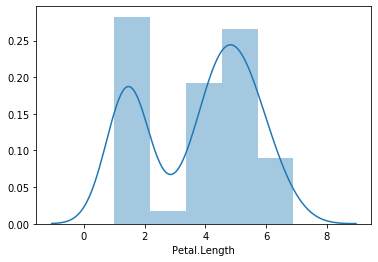

In [7]:
sns.distplot(iris['Petal.Length'])

Is there a correlation between petal length and petal width?

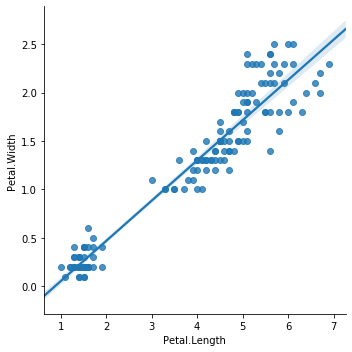

In [65]:
sns.lmplot(x="Petal.Length", y="Petal.Width", data=iris)

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

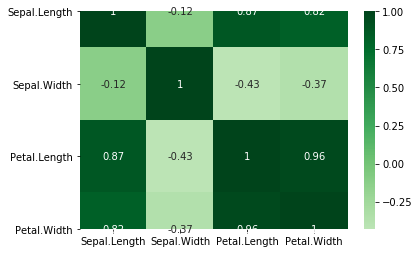

In [63]:
sns.heatmap(iris.corr(), annot= True, center=0, cmap='Greens')
plt.yticks(rotation=0)

Would it be reasonable to predict species based on sepal width and sepal length?

In [59]:
iris.groupby("Species")["Sepal.Length", "Sepal.Width"].mean()

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


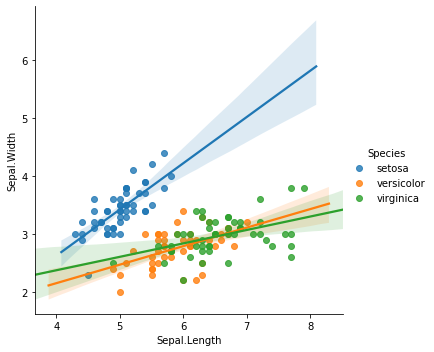

In [69]:
sns.lmplot(x="Sepal.Length", y="Sepal.Width", hue='Species', data=iris)

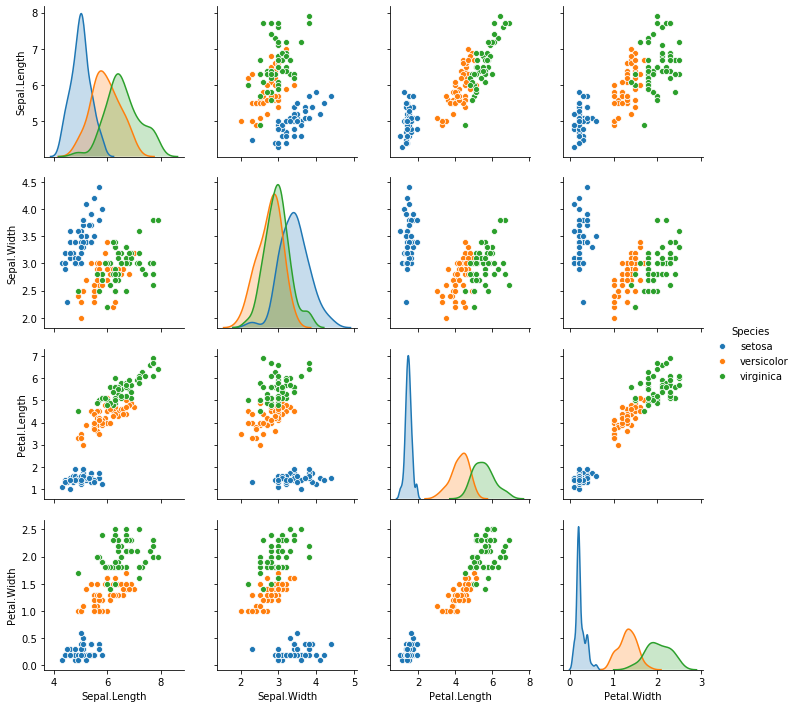

In [57]:
sns.pairplot(iris, hue="Species")

Which features would be best used to predict species?

Petal Length and Petal Width would be much better indicators of species, given that they seem to have a closer correlation thatn the sepal metrics.

# Exercise 2

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [75]:
anscombe = sns.load_dataset("anscombe")

In [76]:
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [77]:
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

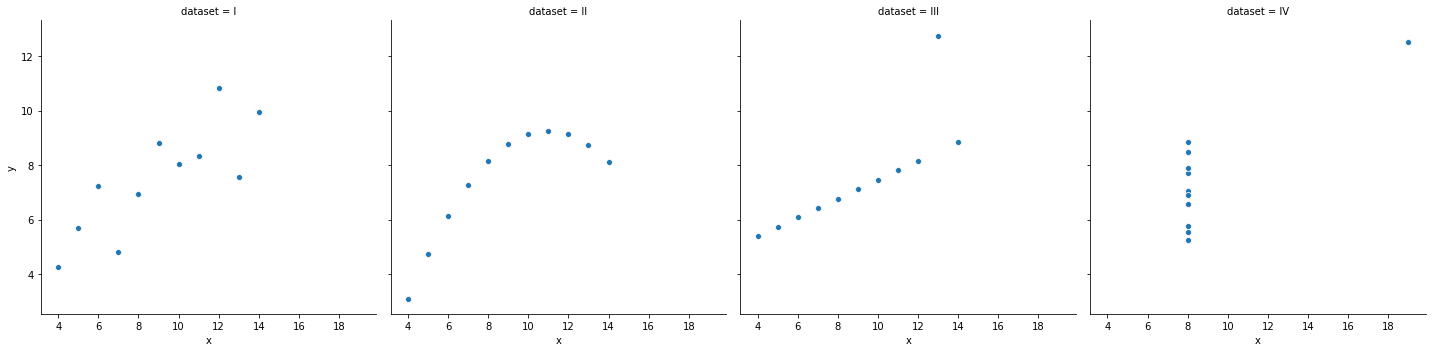

In [86]:
sns.relplot(x="x", y="y", col="dataset", data=anscombe)

# Exercise 3

Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [99]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [103]:
insect_spray = data('InsectSprays')

In [104]:
insect_spray.head(5)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


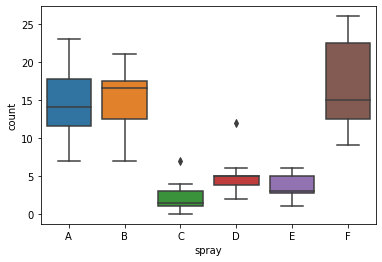

In [95]:
sns.boxplot(data=insect_spray, y="count", x="spray")

# Exercise 4

Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [106]:
data("swiss", show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [105]:
swiss = data("swiss")

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [108]:
swiss.Catholic.mean()

# We will assume a region is catholic is majority (>50) are catholic

41.14382978723404

In [110]:
is_catholic = swiss["Catholic"] > 50

In [115]:
swiss[is_catholic].sort_values(by = "Catholic", ascending = False)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Herens,77.3,89.7,5,2,100.00,18.3
Conthey,75.5,85.9,3,2,99.71,15.1
Entremont,69.3,84.9,7,6,99.68,19.8
Sierre,92.2,84.6,3,3,99.46,16.3
St Maurice,65.0,75.9,9,9,99.06,17.8
Martigwy,70.5,78.2,12,6,98.96,19.4
Veveyse,87.1,64.5,14,6,98.61,24.5
Monthey,79.4,64.9,7,3,98.22,20.2
Gruyere,82.4,53.3,12,7,97.67,21.0
Glane,92.4,67.8,14,8,97.16,24.9


What measure correlates most strongly with fertility?

In [116]:
swiss.corr()

# It seems that education has the most negative correlation
# Catholisms seems to be the strongest positive correlation. 

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


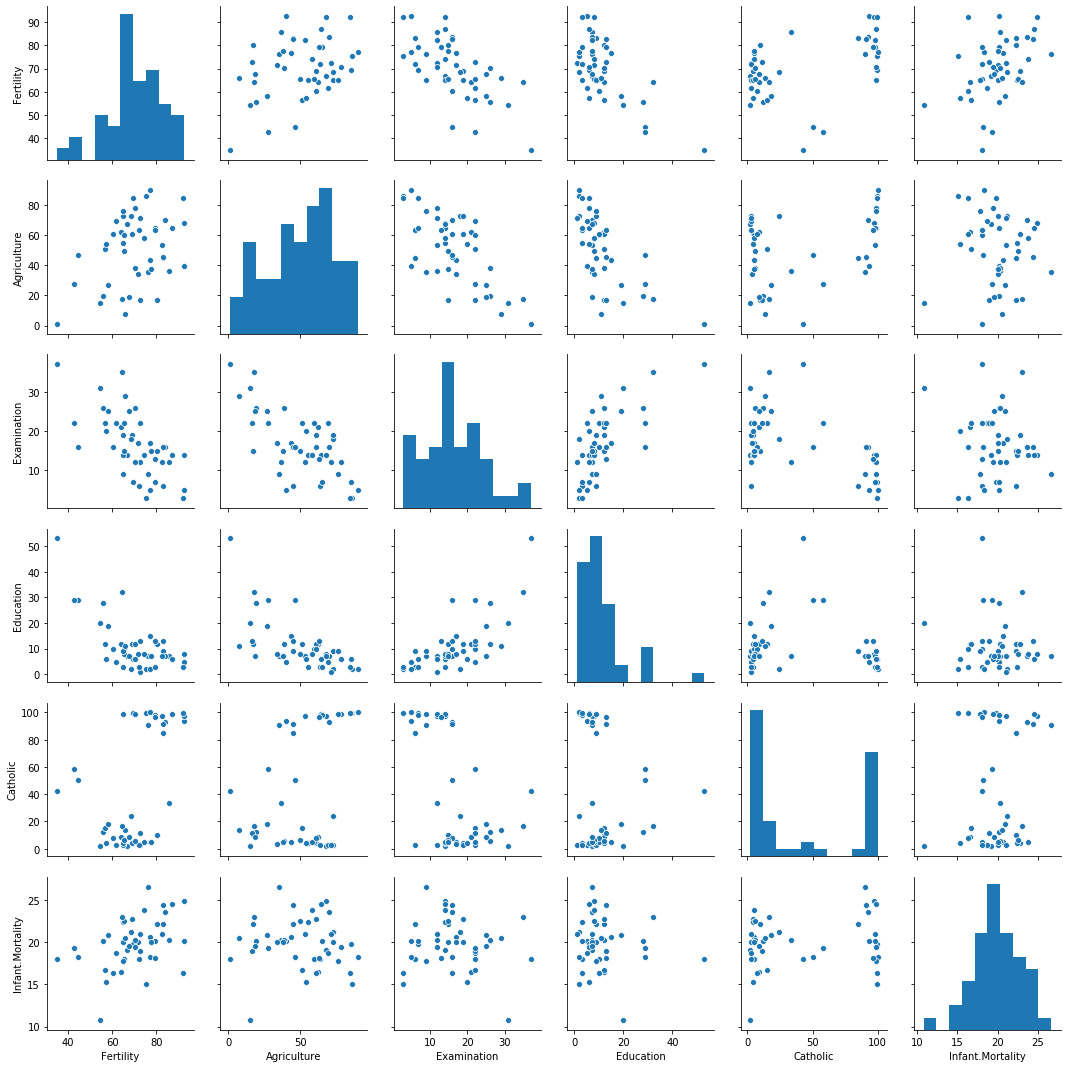

In [118]:
sns.pairplot(swiss)

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [119]:
from env import host, user, password
db_name = "chipotle"
url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
query = '''
SELECT * FROM orders
'''
chipotle = pd.read_sql(query,url)

In [120]:
chipotle.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
1765,1766,712,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, ...",$11.75
2645,2646,1051,3,Chips and Guacamole,nan,$13.35
871,872,360,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Sour Cream, Cheese, Guacamole]]",$11.25
2084,2085,841,1,Veggie Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Cheese,...",$8.75
3611,3612,1446,1,Chips and Guacamole,nan,$4.45


In [128]:
chipotle.item_price = chipotle.item_price.str.replace("$",'').astype("float")

In [131]:
top_items = chipotle.groupby("item_name").item_price.sum().sort_values().tail(4)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

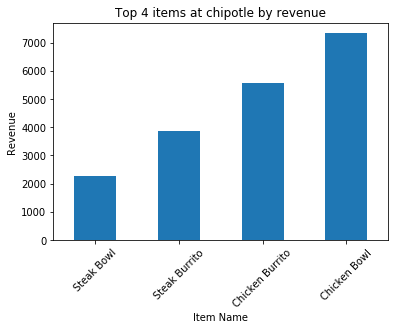

In [138]:
top_items.plot.bar()
plt.title("Top 4 items at chipotle by revenue")
plt.ylabel("Revenue")
plt.xlabel("Item Name")
plt.xticks(rotation=45)

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [141]:
data("sleepstudy", show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [142]:
sleepstudy = data("sleepstudy")

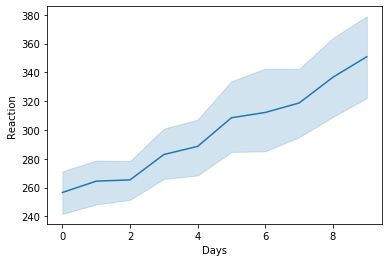

In [188]:
sns.lineplot(x="Days", y="Reaction", data = sleepstudy)

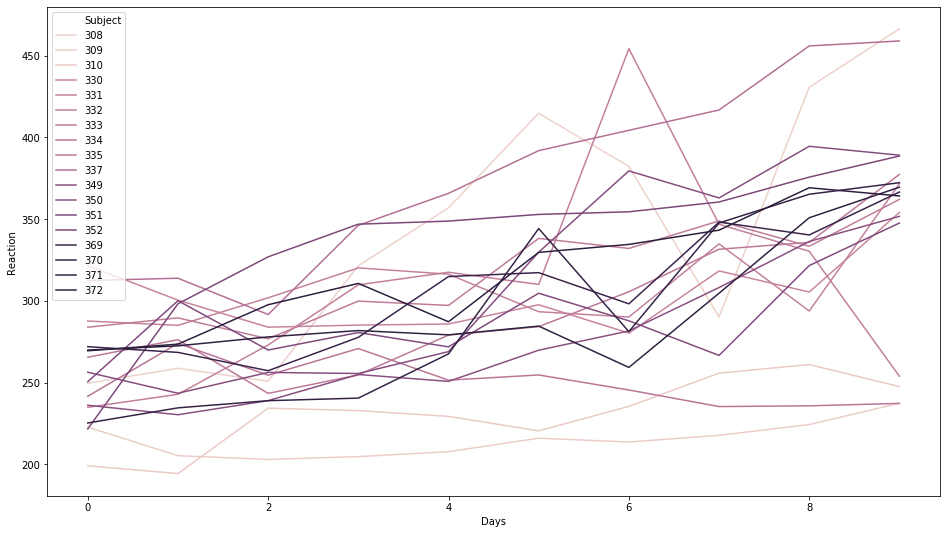

In [182]:
plt.figure(figsize=(16,9))
sns.lineplot(legend = 'full', x="Days", y="Reaction", hue = "Subject", data=sleepstudy)